In [2]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv')

# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1
    
# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


In [3]:
#print the unique values of events
print(judge["events"].unique())

print(stanton["events"].unique())

['strikeout' nan 'walk' 'home_run' 'single' 'field_out' 'double' 'sac_fly'
 'force_out' 'fielders_choice_out' 'intent_walk'
 'grounded_into_double_play' 'field_error' 'hit_by_pitch'
 'strikeout_double_play' 'triple']
['strikeout' nan 'field_out' 'single' 'double' 'home_run' 'walk'
 'fielders_choice_out' 'sac_fly' 'intent_walk' 'force_out'
 'grounded_into_double_play' 'field_error' 'hit_by_pitch'
 'strikeout_double_play' 'pickoff_1b' 'double_play' 'triple'
 'catcher_interf' 'caught_stealing_2b']


In [7]:
#group events for the year 2017 and get the count for each player; Judge
judge_events_2017 = judge.loc[judge['game_year'] == 2017]
judge_events_2017= judge_events_2017["events"].value_counts()
#.events.value_counts()
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.reset_index())

#Stanton
stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017]
#events.value_counts()
stanton_events_2017= stanton_events_2017["events"].value_counts()
print("Stanton batted ball event totals, 2017:")
print(stanton_events_2017.reset_index())


Aaron Judge batted ball event totals, 2017:
                       events  count
0                   strikeout    207
1                   field_out    146
2                        walk    116
3                      single     75
4                    home_run     52
5                      double     24
6   grounded_into_double_play     15
7                 intent_walk     11
8                   force_out     11
9                hit_by_pitch      5
10                    sac_fly      4
11        fielders_choice_out      4
12                field_error      4
13                     triple      3
14      strikeout_double_play      1
Stanton batted ball event totals, 2017:
                       events  count
0                   field_out    239
1                   strikeout    161
2                      single     77
3                        walk     72
4                    home_run     59
5                      double     32
6                 intent_walk     13
7   grounded_into_double_pla

In [8]:
#Which player hit homerun slightly lower and harder?
#Filter data for homerun for the players

j_homerun= judge.loc[judge["events"]== 'home_run']
s_homerun= stanton.loc[stanton["events"]== 'home_run']

/home/codespace/.local/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'Shade'
  cset = contour_func(
/home/codespace/.local/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'Shade'
  cset = contour_func(


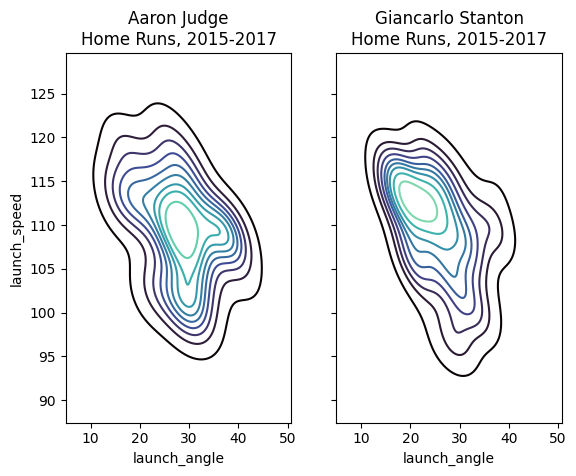

In [9]:
#create plots to visualize launch_speed versus launch_angle for the players using KDE plt
fig1, ax1= plt.subplots(ncols=2 , sharex= True, sharey= True)
sns.kdeplot(x= j_homerun.launch_angle, y= j_homerun.launch_speed , cmap= "mako", Shade= True ,ax=ax1[0])
ax1[0].set_title("Aaron Judge\nHome Runs, 2015-2017")

sns.kdeplot( x= s_homerun.launch_angle,y= s_homerun.launch_speed,  cmap= "mako", Shade= True,ax=ax1[1])
ax1[1].set_title("Giancarlo Stanton\nHome Runs, 2015-2017")
plt.show()

player_hr= "Stanton"

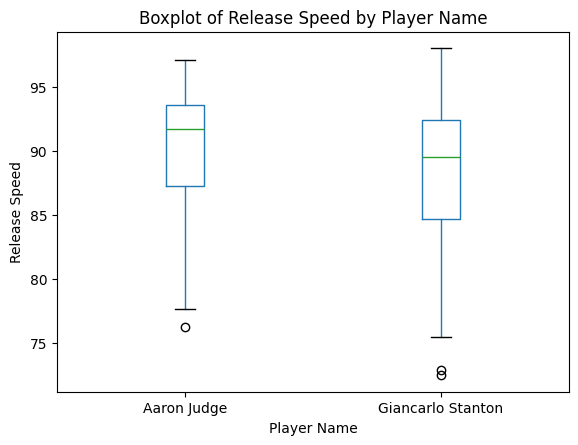

In [13]:
# Ensure combined_df is a DataFrame
combined_df = pd.DataFrame(combined_df)

# Combine the two DataFrames j_homerun and s_homerun
combined_homerun = pd.concat([j_homerun, s_homerun])

# Create boxplots for player name vs release speed
combined_homerun.boxplot(column='release_speed', by='player_name', grid=False)

plt.title('Boxplot of Release Speed by Player Name')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Player Name')
plt.ylabel('Release Speed')
plt.show()

player_fast= 'Judge'

In [14]:
#visualize the homerun strike zones
#remove the zones to ignore
#create a copy of the combined_df
combined_homerun_copy_j= j_homerun.copy()

judge_strike_hr= combined_homerun_copy_j.loc[combined_homerun_copy_j["zone"] <= 9]
#stanton's
combined_homerun_copy_s= s_homerun.copy()

stanton_strike_hr= combined_homerun_copy_s.loc[combined_homerun_copy_s["zone"] <= 9]

#assign cartesian coordinates
judge_strike_hr["zone_x"]= judge_strike_hr.apply(assign_x_coord, axis= 1)
judge_strike_hr["zone_y"]= judge_strike_hr.apply(assign_y_coord, axis= 1)

stanton_strike_hr["zone_x"]= stanton_strike_hr.apply(assign_x_coord, axis= 1)
stanton_strike_hr["zone_y"]= stanton_strike_hr.apply(assign_y_coord, axis= 1)

/tmp/ipykernel_16325/1490247596.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judge_strike_hr["zone_x"]= judge_strike_hr.apply(assign_x_coord, axis= 1)
/tmp/ipykernel_16325/1490247596.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judge_strike_hr["zone_y"]= judge_strike_hr.apply(assign_y_coord, axis= 1)
/tmp/ipykernel_16325/1490247596.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

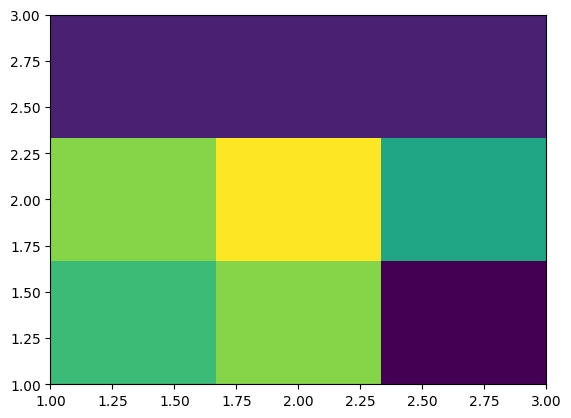

In [16]:
#Create 2D histogram
fig, ax= plt.subplots()
plt.hist2d( judge_strike_hr["zone_x"], judge_strike_hr["zone_y"], bins= 3)
plt.hist2d( stanton_strike_hr["zone_x"], stanton_strike_hr["zone_y"], bins= 3)
plt.show()